In [24]:
import pyautogui
import time
import os

DOFUS_LEFT_MARGIN = 600
DOFUS_BOTTOM_MARGIN = 600
change_map = "/images/map/"
CWD = os.getcwd()

change_map_location = CWD + change_map

# To change to Dofus
time.sleep(2)

regions = {
    "LEFT": (DOFUS_LEFT_MARGIN,1,600,1050*2),
    "RIGHT": (1680*2-250,0,250,1050*2),
    "TOP": (1,1,1680*2,239),
    "BOTTOM": (0,1050*2 - DOFUS_BOTTOM_MARGIN - 200,1680*2,300),
}
region = regions["LEFT"]
for change_map_img in os.listdir(change_map_location):
    print(region)
    """left, top, width, height"""
    location = pyautogui.locateOnScreen(change_map_location + change_map_img, region=region)

    if location:
        x,y = pyautogui.center(location)
        x = x/2
        y = y/2
        pyautogui.moveTo(x,y)
    else:
        print(f"Failed to locate change map with: {change_map_img}")

(600, 1, 600, 2100)
Failed to locate change map with: bottom.png
(600, 1, 600, 2100)
Failed to locate change map with: left.png
(600, 1, 600, 2100)
Failed to locate change map with: top.png
(600, 1, 600, 2100)
Failed to locate change map with: right.png


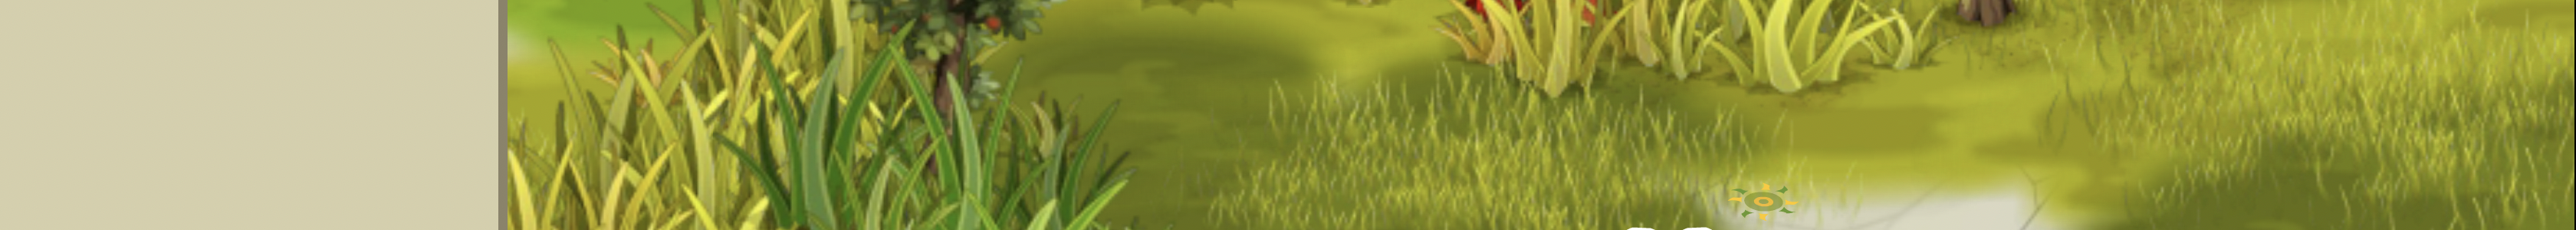

In [22]:
sleep(2)
pyautogui.screenshot(region=regions["BOTTOM"])

In [51]:
sleep(1.5)
box = pyautogui.locateOnScreen("./top.png", confidence=0.9)
point = pyautogui.center(box)
x, y = point

pyautogui.moveTo(x/2, y/2)

box = pyautogui.locateOnScreen("./right.png", confidence=0.9)
point = pyautogui.center(box)
x, y = point

pyautogui.moveTo(x/2, y/2)

box = pyautogui.locateOnScreen("./bottom.png", confidence=0.9)
point = pyautogui.center(box)
x, y = point

pyautogui.moveTo(x/2, y/2)

box = pyautogui.locateOnScreen("./left.png", confidence=0.9)
point = pyautogui.center(box)
x, y = point

pyautogui.moveTo(x/2, y/2)


In [55]:
sleep(1)
box = pyautogui.locateOnScreen("./wheat.png", confidence=0.9)
point = pyautogui.center(box)
x, y = point

pyautogui.moveTo(x/2, y/2)

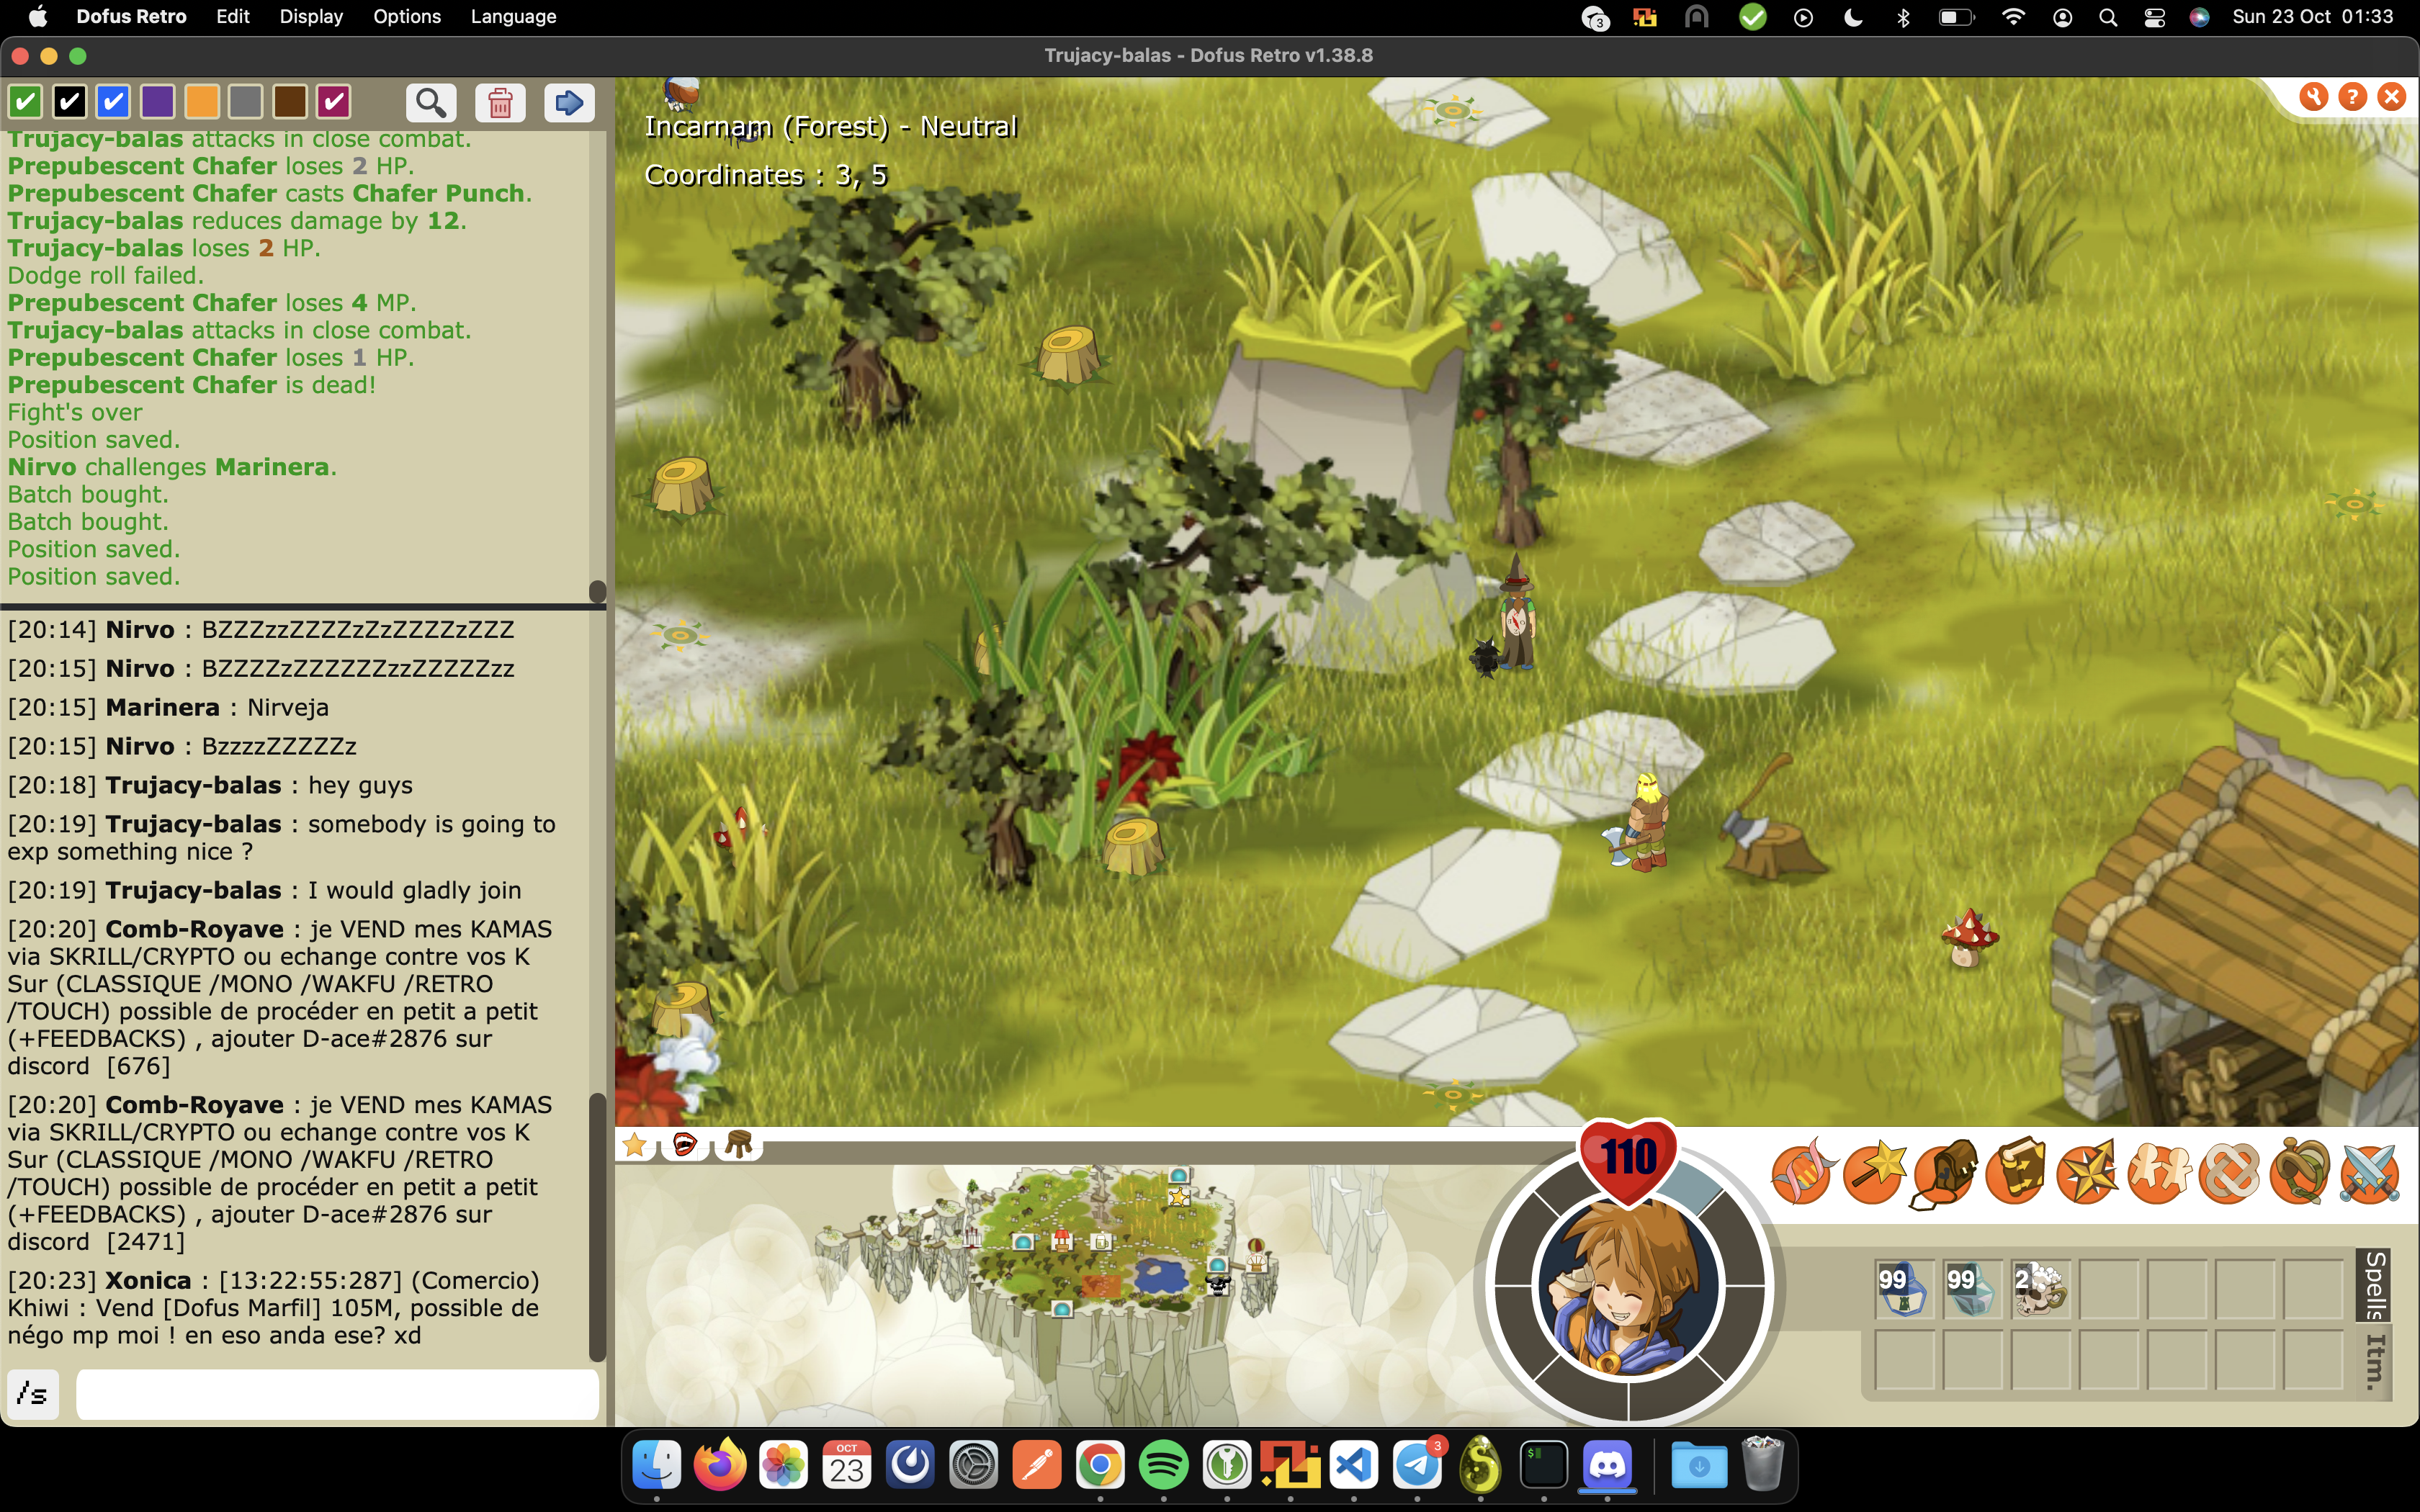

In [6]:
import time
import pyautogui

time.sleep(2)
pyautogui.screenshot()

In [1]:
import cv2
import numpy as np


img_rgb = cv2.imread('./output.png')
template = cv2.imread('./schroom.png')

img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)

height, width = img_rgb.shape
H, W = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
             cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED] 

for method in methods[:1]:
    src2 = img_rgb.copy()
    result = cv2.matchTemplate(src2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    print(min_loc, max_loc)
    if method in [cv2.TM_SQDIFF,cv2.TM_CCORR]:
        lacation = min_loc
    else:
        location = max_loc
    bottom_right = (location[0] + W, location[1] + H)
    cv2.rectangle(src2, location,bottom_right, 255, 5)
    cv2.imshow("",src2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# cv2.imwrite('result.png', img_rgb)


(1996, 1752) (790, 1894)


In [26]:
from time import sleep

import cv2
import numpy as np
import pyautogui

sleep(2)

# rejected_methods = [cv2.TM_CCOEFF, cv2.TM_SQDIFF_NORMED]
img_rgb = pyautogui.screenshot(imageFilename="output.png")
# img_rgb = cv2.cvtColor(np.array(img_rgb), cv2.COLOR_RGB2BGR)
img_rgb = cv2.imread('./output.png')
template = cv2.imread('./schroom.png')

img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)

height, width = img_rgb.shape
H, W = template.shape

methods = [cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
             cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF] 
method = methods[3]

src2 = img_rgb.copy()
result = cv2.matchTemplate(src2, template, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

pyautogui.moveTo(min_loc[0] / 2, min_loc[1]/ 2)

if method in [cv2.TM_SQDIFF,cv2.TM_CCORR]:
    location = min_loc
else:
    location = max_loc
bottom_right = (location[0] + W, location[1] + H)
cv2.rectangle(src2, location,bottom_right, 255, 5)
cv2.imshow("",src2)
cv2.waitKey(0)
cv2.destroyAllWindows()

: 

In [88]:
from typing import Tuple, List
from time import sleep

import cv2
import numpy as np
import pyautogui
import os


def locate_elem_on_image(file_path: str) -> List[Tuple[int, int]]:
    """file_path: image to detect path.
    returns: list of locations
    """
    sleep(1.5)
    pyautogui.screenshot(imageFilename="output.png")
    screenshot = cv2.imread('./output.png')
    template = cv2.imread(f'./{file_path}')

    screenshot = cv2.cvtColor(screenshot, cv2.COLOR_RGB2GRAY)
    template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)

    t_h, t_w = template.shape
    method = cv2.TM_CCOEFF_NORMED

    src2 = screenshot.copy()

    result = cv2.matchTemplate(src2, template, method)
    threshold = 0.85
    locations = np.where(result >= threshold)
    # Plot Style
    line_color = (0, 255, 0)
    line_type = cv2.LINE_4
    
    for loc in locations:
        if not loc:
            continue
        # Determine the box positions
        bottom_right = (loc[0] + t_w, loc[1] + t_h)
        # Draw the box
        cv2.rectangle(src2, loc, bottom_right, line_color, line_type)

    cv2.imshow('Matches', src2)
    cv2.waitKey()

    return list(zip(*locations[::-1]))



def move_cursor_to_location(location: Tuple[int, int]):
    x = location[0] / 2
    y = location[1] / 2
    pyautogui.moveTo(x,y)

def _click(x, y):
    pyautogui.click(x,y)

In [89]:
locations = locate_elem_on_image(file_path="images/monsters/black_gobby/" + GOBBY_IMAGES[0])
locations

/var/folders/xm/7950cq6n3pn27q_09_rqxm6r0000gp/T/ipykernel_11870/1846052772.py:35: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not loc:


[]

: 

In [43]:
for location in locations:
    sleep(1.0)
    x = location[0] / 2
    y = location[1] / 2
    pyautogui.moveTo(x, y)
    pyautogui.click(x,y)

In [81]:
locations = ([], [])

In [2]:
from typing import Tuple, List
from time import sleep

import cv2
import numpy as np
import pyautogui
import os

sleep(1.5)

pyautogui.moveTo(2368 / 2, 918 / 2)